### Importing the packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


### Loading the dataset

In [2]:
data_mat = pd.read_csv('student-mat.csv', sep=';')
data_mat.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
data_por = pd.read_csv('student-por.csv', sep=';')
data_por.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
# merge the 2 datasets
#merge both datasets
data = pd.concat([data_mat,data_por])

In [5]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [6]:
# renaming the column labels
data.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education',
                'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
                'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
                'free_time','go_out','weekday_alcohol_usage','weekend_alcohol_usage','health','absences','1stperiod_grade','2ndperiod_grade','final_score']

### Note: 
> G1 is now `1stperiod_grade`
> G2 is now `2ndperiod_grade`
> G3 is now `final_score`

In [7]:
# the size of the data set
data.shape

(1044, 33)

In [8]:
# type of variables
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   school                 1044 non-null   object
 1   sex                    1044 non-null   object
 2   age                    1044 non-null   int64 
 3   address                1044 non-null   object
 4   family_size            1044 non-null   object
 5   parents_status         1044 non-null   object
 6   mother_education       1044 non-null   int64 
 7   father_education       1044 non-null   int64 
 8   mother_job             1044 non-null   object
 9   father_job             1044 non-null   object
 10  reason                 1044 non-null   object
 11  guardian               1044 non-null   object
 12  commute_time           1044 non-null   int64 
 13  study_time             1044 non-null   int64 
 14  failures               1044 non-null   int64 
 15  school_support        

In [9]:
# statistical description of the data
data.describe()

,age,mother_education,father_education,commute_time,study_time,failures,family_quality,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,1stperiod_grade,2ndperiod_grade,final_score
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [10]:
# checking for missing value
data.isna().sum()

school                   0
sex                      0
age                      0
address                  0
family_size              0
parents_status           0
mother_education         0
father_education         0
mother_job               0
father_job               0
reason                   0
guardian                 0
commute_time             0
study_time               0
failures                 0
school_support           0
family_support           0
paid_classes             0
activities               0
nursery                  0
desire_higher_edu        0
internet                 0
romantic                 0
family_quality           0
free_time                0
go_out                   0
weekday_alcohol_usage    0
weekend_alcohol_usage    0
health                   0
absences                 0
1stperiod_grade          0
2ndperiod_grade          0
final_score              0
dtype: int64

In [11]:
#make a copy of the dataset that would be used for regression model
data_reg = data.copy()

### Descriptive Statistical Analysis

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


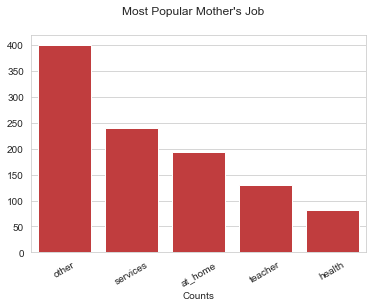

In [12]:
var = data['mother_job'].value_counts()[:10]
base_color = sns.color_palette()[3]
sns.barplot(var.index, var.values, color=base_color)
plt.suptitle("Most Popular Mother's Job")
plt.xlabel('Counts')
plt.xticks(rotation=30);
plt.show();

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


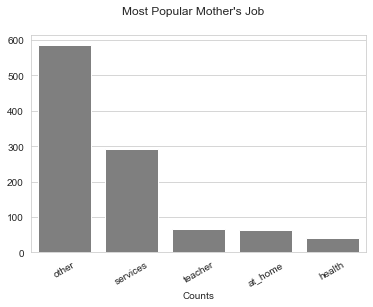

In [13]:
var = data['father_job'].value_counts()[:10]
base_color = sns.color_palette()[7]
sns.barplot(var.index, var.values, color=base_color)
plt.suptitle("Most Popular Mother's Job")
plt.xlabel('Counts')
plt.xticks(rotation=30);
plt.show();

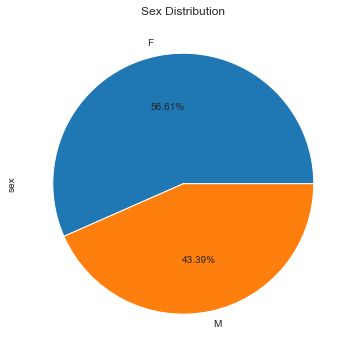

In [14]:
data['sex'].value_counts().plot(kind='pie', autopct = '%1.2f%%', figsize = (6,6));
plt.title('Sex Distribution');

<ipython-input-15-57551982c7b8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(['sex'])['sex', '1stperiod_grade'].sum().plot(kind='bar', figsize=[12, 6]);


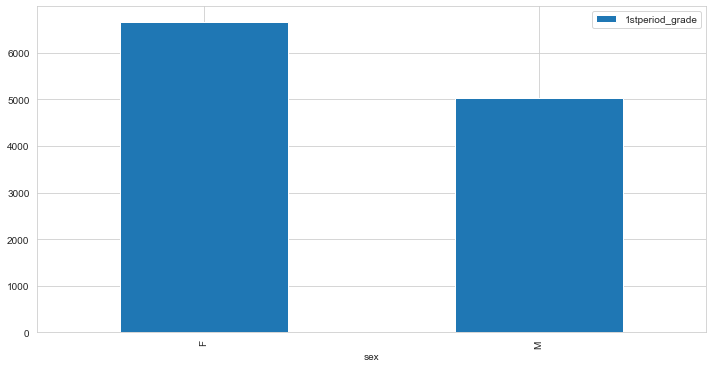

In [15]:
data.groupby(['sex'])['sex', '1stperiod_grade'].sum().plot(kind='bar', figsize=[12, 6]);

<ipython-input-16-e19713976a81>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(['sex'])['sex', '2ndperiod_grade'].sum().plot(kind='bar', figsize=[12, 6]);


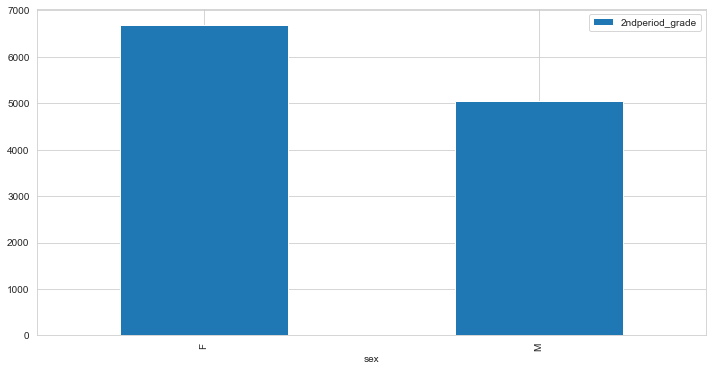

In [16]:
data.groupby(['sex'])['sex', '2ndperiod_grade'].sum().plot(kind='bar', figsize=[12, 6]);

<ipython-input-17-07b29a6d5683>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(['sex'])['sex', 'final_score'].sum().plot(kind='bar', figsize=[12, 6]);


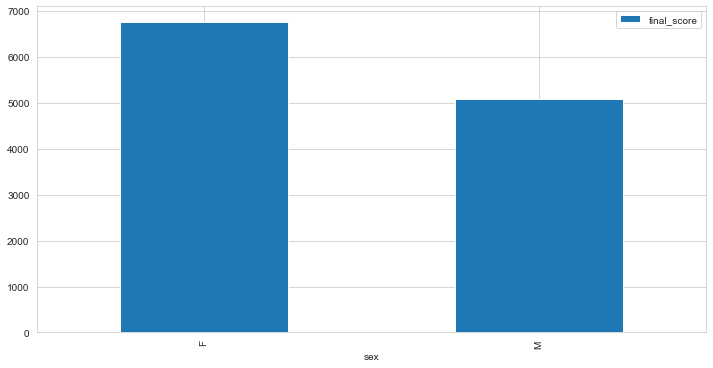

In [17]:
data.groupby(['sex'])['sex', 'final_score'].sum().plot(kind='bar', figsize=[12, 6]);

## Performing Factor Analysis

### Adequacy Test

Before you perform factor analysis, you need to evaluate the “factorability” of our dataset. Factorability means "can we found the factors in the dataset?". There are two methods to check the factorability or sampling adequacy:

1. Bartlett’s Test
2. Kaiser-Meyer-Olkin Test

>**Bartlett’s test of sphericity** checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis.

> **Kaiser-Meyer-Olkin (KMO) Test**: measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

In [18]:
# drop categorical features for factor analysis
drop = ['school', 'sex', 'address', 'family_size', 'parents_status', 'mother_job', 'father_job', 'reason', 'guardian', 'school_support', 'family_support', 'paid_classes', 'activities', 'nursery', 'desire_higher_edu', 'internet', 'romantic']
data_drop = data.drop(drop, axis=1)

In [19]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(data_drop)
chi_square_value, p_value

(5441.116504048354, 0.0)

In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

In [20]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(data_drop)

In [21]:
kmo_model

0.7170536836924623

The overall KMO for our data is 0.71, which is excellent. This value indicates that you can proceed with your planned factor analysis.

### Choosing the Number of Factors
For choosing the number of factors, you can use the Kaiser criterion and scree plot. Both are based on eigenvalues.

In [22]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(25, rotation=None)
fa.fit(data_drop)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([3.48959308, 1.97747415, 1.52990878, 1.2980022 , 1.13251206,
       1.01409718, 0.90855187, 0.88232429, 0.81851535, 0.76657427,
       0.6421676 , 0.5907533 , 0.36220645, 0.31424098, 0.19361124,
       0.07946719])

Here, you can see only for 6-factors eigenvalues are greater than one. It means we need to choose only 6 factors (or unobserved variables).

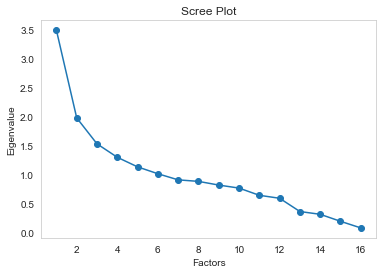

In [23]:
# Create scree plot using matplotlib
plt.scatter(range(1,data_drop.shape[1]+1),ev)
plt.plot(range(1,data_drop.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

The scree plot method draws a straight line for each factor and its eigenvalues. Number eigenvalues greater than one considered as the number of factors.

Here, you can see only for 6-factors eigenvalues are greater than one. It means we need to choose only 6 factors (or unobserved variables).

### Regression Model

In [24]:
# split dataset into testing and training set
from sklearn.model_selection import train_test_split
X = data_reg.drop('final_score',axis=1)
y = data_reg.final_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

# get dummy varibles 
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [25]:
from sklearn.ensemble import  RandomForestRegressor
rfg_model = RandomForestRegressor(random_state=55)
rfg_model.fit(X_train, y_train)

RandomForestRegressor(random_state=55)

In [26]:
rfg_model.feature_importances_

array([7.38951369e-03, 4.00888821e-03, 3.65979742e-03, 2.68028384e-03,
       8.38888919e-03, 1.68514990e-03, 7.41364724e-03, 4.50122977e-03,
       5.63702180e-03, 3.81777546e-03, 2.41333520e-03, 8.60338366e-03,
       6.27165468e-02, 8.40824148e-03, 8.13939644e-01, 1.42040456e-03,
       9.87649793e-04, 1.70599235e-03, 1.27469144e-03, 8.71022005e-04,
       6.62977364e-04, 8.98855839e-04, 6.06108956e-04, 5.06762209e-04,
       4.46254623e-04, 4.63687791e-04, 1.31698335e-03, 2.32102568e-03,
       1.97786577e-03, 2.13095790e-03, 7.78713592e-04, 2.36854664e-04,
       1.57589724e-03, 1.62766441e-03, 3.89019918e-04, 3.02000990e-03,
       5.16099987e-03, 1.60372172e-03, 7.49738436e-04, 2.15323549e-03,
       2.57325060e-03, 9.52043068e-04, 1.54700327e-03, 5.82970493e-04,
       7.37609929e-04, 8.24212794e-04, 9.94055655e-04, 5.92300591e-04,
       1.12393002e-03, 1.31856748e-03, 7.29932577e-04, 1.37394210e-03,
       8.10622808e-04, 1.29791749e-03, 7.88764014e-04, 4.17740876e-04,
      

In [27]:
feature_importances = pd.DataFrame(rfg_model.feature_importances_,
                                    index = X_train.columns,
                                    columns=['importance']).sort_values('importance',
                                    ascending=False)
feature_importances

,importance
2ndperiod_grade,0.813940
absences,0.062717
health,0.008603
1stperiod_grade,0.008408
study_time,0.008389
family_quality,0.007414
age,0.007390
go_out,0.005637
reason_home,0.005161
free_time,0.004501


In [28]:
predictions = rfg_model.predict(X_test)

In [29]:
print( 'RandomForest Accuracy: ')
print(((predictions)))

RandomForest Accuracy: 
[14.46       13.34       13.77       16.36       10.89        8.94
 10.49       12.25       13.6        12.61       11.16       12.23
 12.24        9.85       12.64       12.32       17.89        9.92
 10.96       14.72       16.55       10.89       12.27       10.39
 13.22        2.67       14.87       10.93       13.1        10.24
  9.68       15.14       11.03       15.57083333 10.87       15.685
 12.22        7.59       13.49       15.17       14.51       14.22
 10.99        9.65       15.14333333 10.2        11.49       18.11
  9.26        8.78        1.62        6.75       11.4        11.33
 12.37       17.95       14.53       12.11       14.19       11.04
 15.64       13.13       14.4        15.645      13.6        13.05
 17.96        9.77       10.57        9.68       13.65       12.47
 11.17       13.21       13.34       17.29       13.21       10.48
  9.46        7.59       12.06       14.44       10.29       10.5
 12.46       10.94       13.18       1

In [30]:
from sklearn import metrics
print('MAE: ', metrics.mean_absolute_error(y_test, predictions))
print('MSE: ', metrics.mean_squared_error(y_test, predictions)) 

MAE:  0.9202468152866241
MSE:  2.1702045758138713


### CLASSIFYING AND ANALYZING THE DATASET AND BUILD RANDOM FOREST CLASSIFICATION MODEL

In [31]:
# classifying the final grade, which would be used eventually for classification model
# convert final_score to categorical variable 
# Good:15~20 Fair:10~14 Poor:0~9
data['final_grade'] = 'na'
data.loc[(data.final_score >= 15) & (data.final_score <= 20), 'final_grade'] = 'good' 
data.loc[(data.final_score >= 10) & (data.final_score <= 14), 'final_grade'] = 'fair' 
data.loc[(data.final_score >= 0) & (data.final_score <= 9), 'final_grade'] = 'poor' 

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Student')

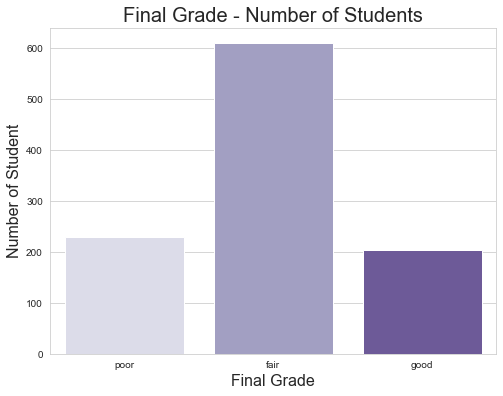

In [32]:
# Final Grade Countplot
plt.figure(figsize=(8,6))
sns.countplot(data.final_grade, order=["poor","fair","good"], palette='Purples')
plt.title('Final Grade - Number of Students',fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Number of Student', fontsize=16)

Text(0.5, 1.0, 'Correlation Heatmap')

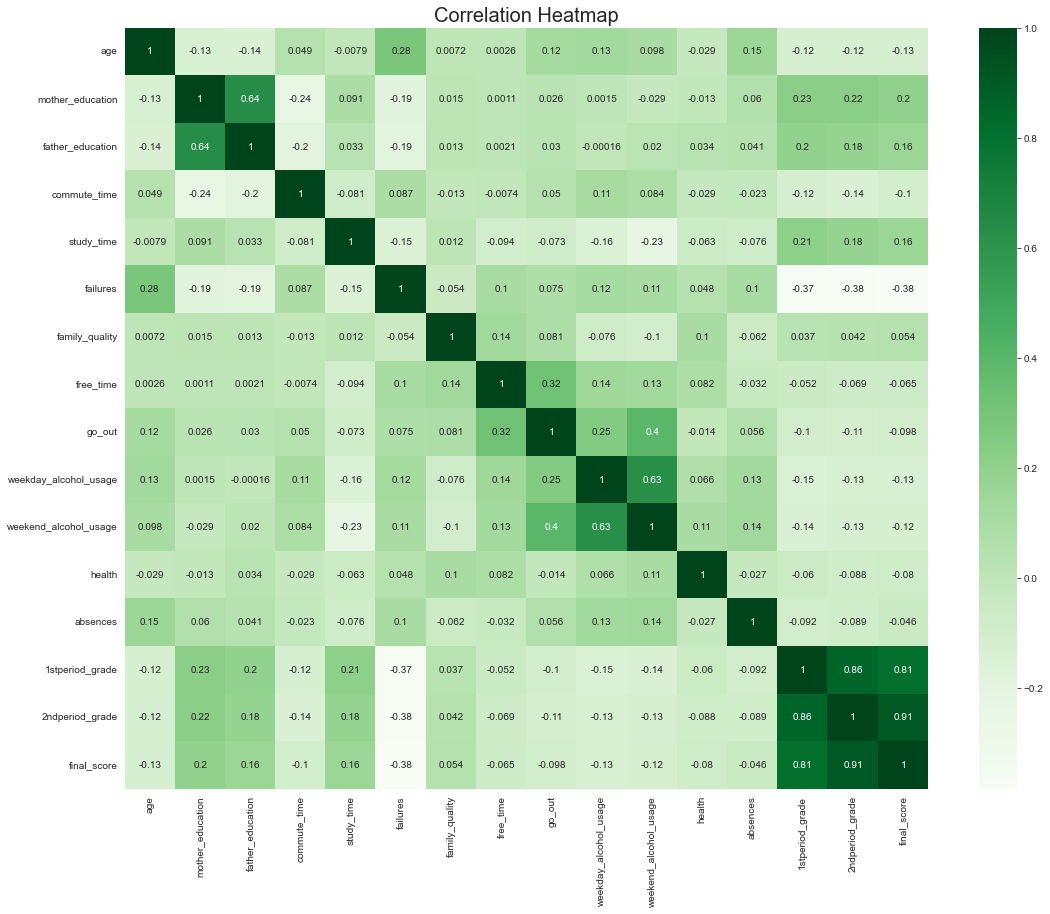

In [33]:
# see correlation between variables through a correlation heatmap
cor = data.corr()
plt.figure(figsize=(18,14))
sns.heatmap(cor, annot=True, cmap="Greens")
plt.title('Correlation Heatmap', fontsize=20)

It is evident that 1st period grade,2nd period grade and final score are highly correlated

In [34]:
perc = (lambda col: col/col.sum())
index = ['poor','fair','good']

Text(0.5, 0, 'Final Grade')

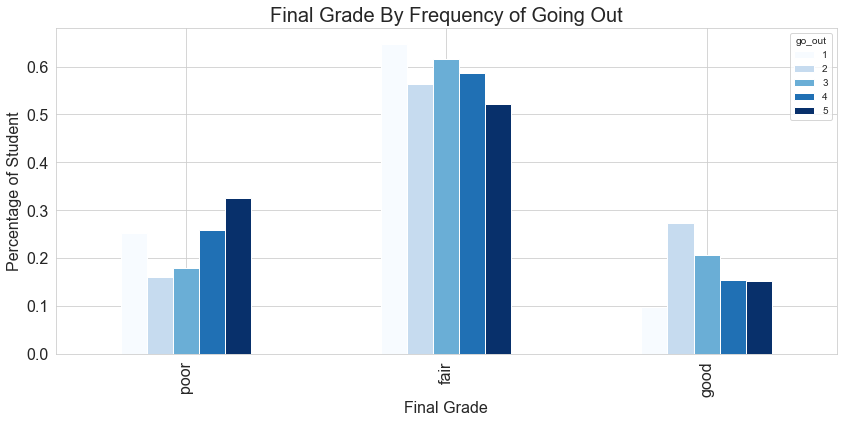

In [35]:
#(numeric: from 1 - very low to 5 - very high)
out_tab = pd.crosstab(index=data.final_grade, columns=data.go_out)
out_perc = out_tab.apply(perc).reindex(index)

out_perc.plot.bar(colormap="Blues", fontsize=16, figsize=(14,6))
plt.title('Final Grade By Frequency of Going Out', fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

Text(0, 0.5, 'Percentage of Student')

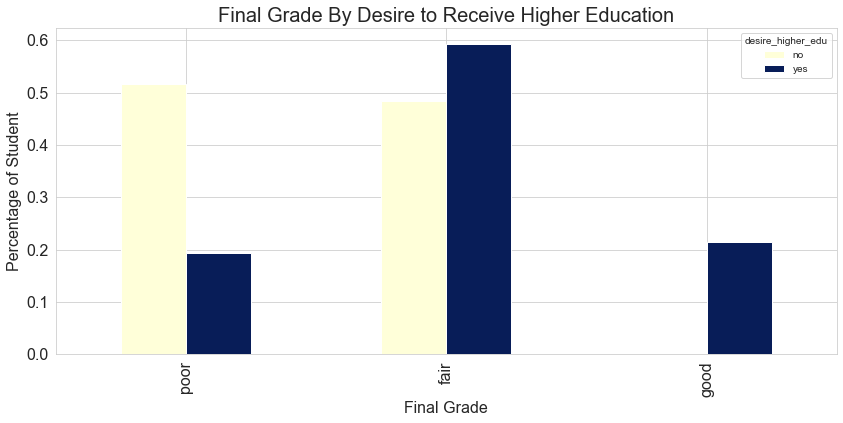

In [36]:
higher_tab = pd.crosstab(index=data.final_grade, columns=data.desire_higher_edu)
higher_perc = higher_tab.apply(perc).reindex(index)

higher_perc.plot.bar(colormap="YlGnBu", figsize=(14,6), fontsize=16)
plt.title('Final Grade By Desire to Receive Higher Education', fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


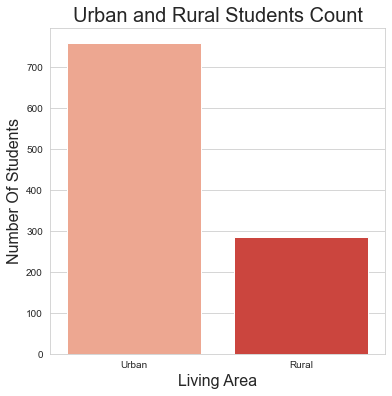

In [37]:
# living area: urban vs. rural
data.address = data.address.map({'U':'Urban', 'R':'Rural'})

#count of students living in urban area vs rural
plt.figure(figsize=(6,6))
sns.countplot(data.address, palette='Reds')
plt.title('Urban and Rural Students Count', fontsize=20)
plt.xlabel('Living Area', fontsize=16)
plt.ylabel('Number Of Students', fontsize=16)
plt.show()

Text(0.5, 0, 'Final Grade')

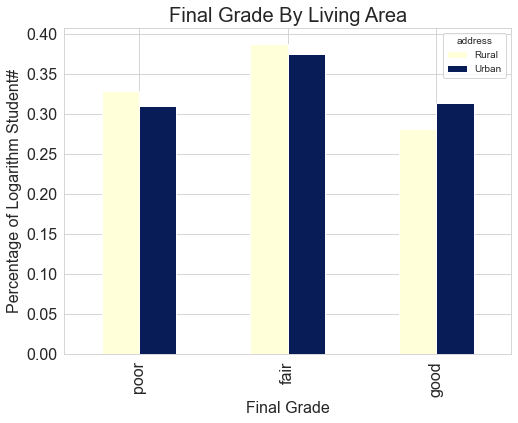

In [38]:
ad_tab1 = pd.crosstab(index=data.final_grade, columns=data.address)
ad_tab = np.log(ad_tab1)
ad_perc = ad_tab.apply(perc).reindex(index)

#plot
ad_perc.plot.bar(colormap="YlGnBu", fontsize=16, figsize=(8,6))
plt.title('Final Grade By Living Area', fontsize=20)
plt.ylabel('Percentage of Logarithm Student#', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

<Figure size 432x288 with 0 Axes>

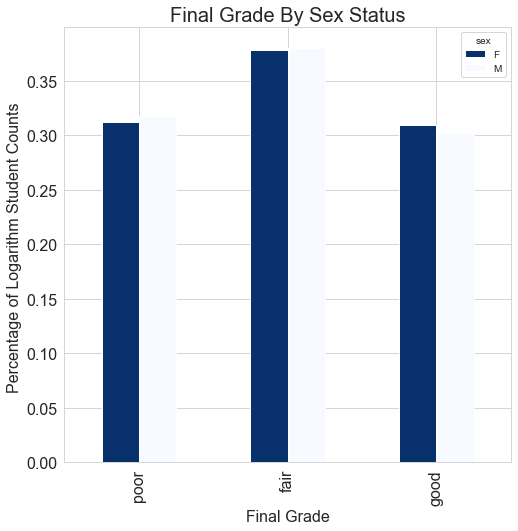

In [39]:
# sex status
perc = (lambda col: col/col.sum())
index = ['poor','fair','good']
romance_tab1 = pd.crosstab(index=data.final_grade, columns=data.sex)
romance_tab = np.log(romance_tab1)
romance_perc = romance_tab.apply(perc).reindex(index)
#plot
plt.figure()
romance_perc.plot.bar(colormap="Blues_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By Sex Status', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

<Figure size 432x288 with 0 Axes>

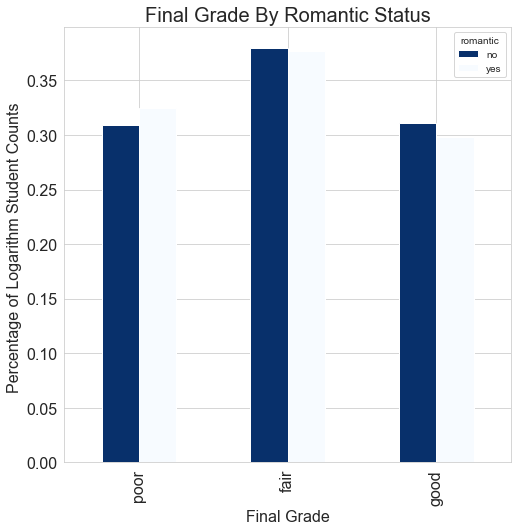

In [40]:
# romantic status
perc = (lambda col: col/col.sum())
index = ['poor','fair','good']
romance_tab1 = pd.crosstab(index=data.final_grade, columns=data.romantic)
romance_tab = np.log(romance_tab1)
romance_perc = romance_tab.apply(perc).reindex(index)
#plot
plt.figure()
romance_perc.plot.bar(colormap="Blues_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By Romantic Status', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

In [41]:
# preparing the dataset for modelling
data_cd = data.copy()
data_cd = data_cd.drop([ 'final_score'], axis=1)

# label encode final_grade
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data_cd.final_grade = le.fit_transform(data_cd.final_grade)

# split dataset into testing and training set
from sklearn.model_selection import train_test_split
X = data_cd.drop('final_grade',axis=1)
y = data_cd.final_grade
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

# get dummy varibles 
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [42]:
from sklearn.ensemble import  RandomForestClassifier
rfc_model = RandomForestClassifier(random_state=55)
rfc_model.fit(X_train, y_train)

RandomForestClassifier(random_state=55)

In [43]:
from sklearn.metrics import accuracy_score
print("Accuracy of train:",rfc_model.score(X_train, y_train))
print("Accuracy of test:",rfc_model.score(X_test, y_test))

Accuracy of train: 1.0
Accuracy of test: 0.8726114649681529


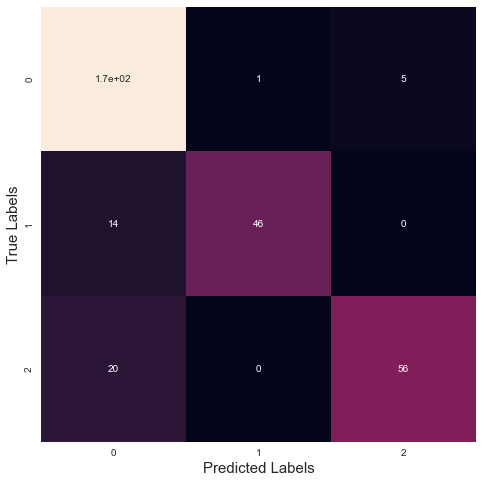

In [44]:
rfc_prediction = rfc_model.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, rfc_prediction)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [45]:
feature_importances = pd.DataFrame(rfc_model.feature_importances_,
                                    index = X_train.columns,
                                    columns=['importance']).sort_values('importance',
                                    ascending=False)
feature_importances

,importance
2ndperiod_grade,0.328030
1stperiod_grade,0.173890
failures,0.035733
absences,0.033659
go_out,0.021433
mother_education,0.019136
health,0.019135
age,0.018885
weekend_alcohol_usage,0.018828
free_time,0.015823
